# Extração de Informações de HTML

In [ ]:
!pip install urllib3 # instalar a biblioteca utllib3

In [ ]:
!pip install beautifulsoup4 # buscar exatamente as informações do HTML.

In [ ]:
import urllib3 # extrair o código fonte
from bs4 import BeautifulSoup

In [ ]:
# Vamos instalar e chamar a biblioteca urllib3
# urllib3 é muito usada para busca e carregamento de informações de sites
!pip install urllib3 # instalar a biblioteca utllib3
!pip install beautifulsoup4 # buscar exatamente as informações do HTML.
import urllib3 # extrair o código fonte
from bs4 import BeautifulSoup

In [ ]:
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning) # imperdir Avisos
http = urllib3.PoolManager() #PoolManager é uma classe especifica para a busca de informações em sites da web
pagina = http.request('GET','https://narguiledotom.blogspot.com/') # Podemos usar o método GET ou o método POST

In [ ]:
pagina.status # Verifica se a busca das informações da página funcionou

200

4.2. Extração de informações com BeautifulSoup

In [ ]:
sopa = BeautifulSoup(pagina.data, "lxml") # BeautifulSoup faz a raspagem do site 
for tags in sopa(['script', 'style']):
    tags.decompose()

conteudo = ' '.join(sopa.stripped_strings)
conteudo

'Narguile do Tom Narguile do Tom Blog criado para divulgação e venda de narguiles e acessórios. Contato: Tom Telefones (18) 9111-1063 ou (18) 8158-6111 - Faça sua encomenda agora! sábado, 8 de outubro de 2011 Atenção galera!!! Publicar postagem Postado por Tom às 22:02 Nenhum comentário: Enviar por e-mail Postar no blog! Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest domingo, 21 de agosto de 2011 Promoção Essencias e Carvão Nesta promoção voce paga\xa03 essencias e 3 carvão\xa0e\xa0leva um carvão de brinde! \ufeff Postado por Tom às 22:45 Nenhum comentário: Enviar por e-mail Postar no blog! Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest sexta-feira, 5 de agosto de 2011 Essências Essência - Vários sabores ! Postado por Tom às 12:13 Nenhum comentário: Enviar por e-mail Postar no blog! Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest quinta-feira, 4 de agosto de 2011 Narguiles Médio Comprando um nar

# Pré-Processamento

4.3. Pré-Processamento

In [ ]:
# Instalar as bibliotecas para utilização do nltk
! pip install nltk # Instalar a biblioteca NLTK
import nltk # Instalar a biblioteca NLTK
nltk.download('punkt') # no Google Colab é muito importante

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Pré-processamento: Expressões Regulares
# Biblioteca para utilização de Expressões Regulares
import re
conteudo_sem_numero = re.sub('[-|0-9]',' ', conteudo) # Retirar todos os números da frase
conteudo_sem_numero # vamos ver os resultados

'Narguile do Tom Narguile do Tom Blog criado para divulgação e venda de narguiles e acessórios. Contato: Tom Telefones (  )           ou (  )             Faça sua encomenda agora! sábado,   de outubro de      Atenção galera!!! Publicar postagem Postado por Tom às   :   Nenhum comentário: Enviar por e mail Postar no blog! Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest domingo,    de agosto de      Promoção Essencias e Carvão Nesta promoção voce paga\xa0  essencias e   carvão\xa0e\xa0leva um carvão de brinde! \ufeff Postado por Tom às   :   Nenhum comentário: Enviar por e mail Postar no blog! Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest sexta feira,   de agosto de      Essências Essência   Vários sabores ! Postado por Tom às   :   Nenhum comentário: Enviar por e mail Postar no blog! Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest quinta feira,   de agosto de      Narguiles Médio Comprando um nar

In [ ]:
# Pré-processamento: Expressões Regulares
# remover os símbolos de pontuação e outros símbolos (caracteres como copyright, por exemplo) de uma string.
# caso queira deixar os caracteres acentuados, basta retirar do código
conteudo_limpo = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', conteudo_sem_numero)
conteudo_limpo

'Narguile do Tom Narguile do Tom Blog criado para divulgação e venda de narguiles e acessórios Contato: Tom Telefones              ou                Faça sua encomenda agora sábado   de outubro de      Atenção galera Publicar postagem Postado por Tom s   :   Nenhum comentário: Enviar por e mail Postar no blog Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest domingo    de agosto de      Promoção Essencias e Carvão Nesta promoção voce paga  essencias e   carvãoeleva um carvão de brinde  Postado por Tom s   :   Nenhum comentário: Enviar por e mail Postar no blog Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest sexta feira   de agosto de      Essências Essência   Vários sabores  Postado por Tom s   :   Nenhum comentário: Enviar por e mail Postar no blog Compartilhar no Twitter Compartilhar no Facebook Compartilhar com o Pinterest quinta feira   de agosto de      Narguiles Médio Comprando um narguile médio você ganha   carvão pastilh

In [ ]:
# Pré-processamento: Tokenização
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
sentencas = sent_tokenize(conteudo_limpo)
palavras_tokens = word_tokenize(conteudo_limpo.lower())
palavras_tokens

In [ ]:
# Pré-processamento: Retirando as StopWords
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
stopwords = set(stopwords.words('portuguese') + list(punctuation))
stopwords.update(('b','pode','uso','ser','c','h'))
conteudo_sem_stopwords_portugues = [palavras_tokens for palavras_tokens in palavras_tokens if palavras_tokens not in stopwords]
conteudo_sem_stopwords_portugues

In [ ]:
# Pré-processamento: Retirando as StopWords
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
stopwords = set(stopwords.words('english') + list(punctuation))
conteudo_sem_stopwords_ingles = [conteudo_sem_stopwords_portugues for conteudo_sem_stopwords_portugues in conteudo_sem_stopwords_portugues if conteudo_sem_stopwords_portugues not in stopwords]
conteudo_sem_stopwords_ingles

In [ ]:
# Pré-processamento: Distribuição de Frequência de Palavras
from nltk.probability import FreqDist
frequencia = FreqDist(conteudo_sem_stopwords_ingles)
d = frequencia

for i in sorted(d, key = d.get, reverse=True):
    print(i, d[i])

In [ ]:
freq = nltk.FreqDist(frequencia)

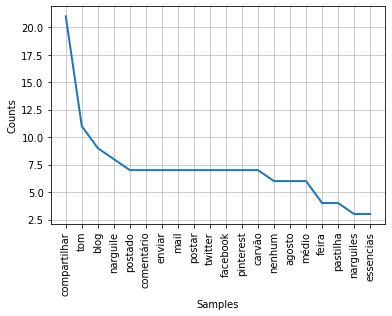

In [ ]:
freq.plot(20, cumulative=False)